### importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns

### read the data

In [2]:
use_train_selected_genes = 1

if use_train_selected_genes:
    train = pd.read_csv('./datasets/training_data_after_feature_selection.csv')
    train = train.drop(['Unnamed: 0'],axis=1)
    
    
else:
    train = pd.read_csv('./datasets/Initial_training_data/train_data_whole_merged.csv')
    
    

try:
    train['SEPT4']

except:
    train.rename(columns={'Sep-04': 'SEPT4'}, inplace=True)
else:
    print('SEPT4 was present already')

SEPT4 was present already


In [3]:
train.columns
if use_train_selected_genes:
    y = train['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)']
    x = train[train.columns[:-1]]
    
else:
    train = train[train.columns[2:]]
    yy = train['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)']
    x = train[train.columns[1:]]
    y = []
    for i in yy:
        if i=='NSCLC':
            y.append(0)
        else:
            y.append(1)
x = np.array(x)
y = np.array(y)

### applying PCA

In [4]:
# original_data_with_412_genes

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.01994609832763672 seconds


### applying tSNE

In [5]:
time_start = time.time()

fashion_tsne = TSNE(random_state=2).fit_transform(x)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 5.5621209144592285 seconds


### function for scatter plots

In [6]:

def fashion_scatter(x, colors, Title):
    
    
    
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    print(np.unique(colors))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8),dpi = 300)
    
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.title(Title)
    if Title == 'PCA Dimensionality Reduction': 
        plt.xlabel('PCA-1')
        plt.ylabel('PCA-2')
    else:
        plt.xlabel('DIM-1')

        plt.ylabel('DIM-2')
    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        if i == 0:
            j = 'NSCLC'
        else:
            j = 'Normal'
        txt = ax.text(xtext, ytext, str(j), fontsize=15)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=3, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return f, ax, sc, txts

In [7]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.39519879 0.06461404 0.04518411 0.03591553]


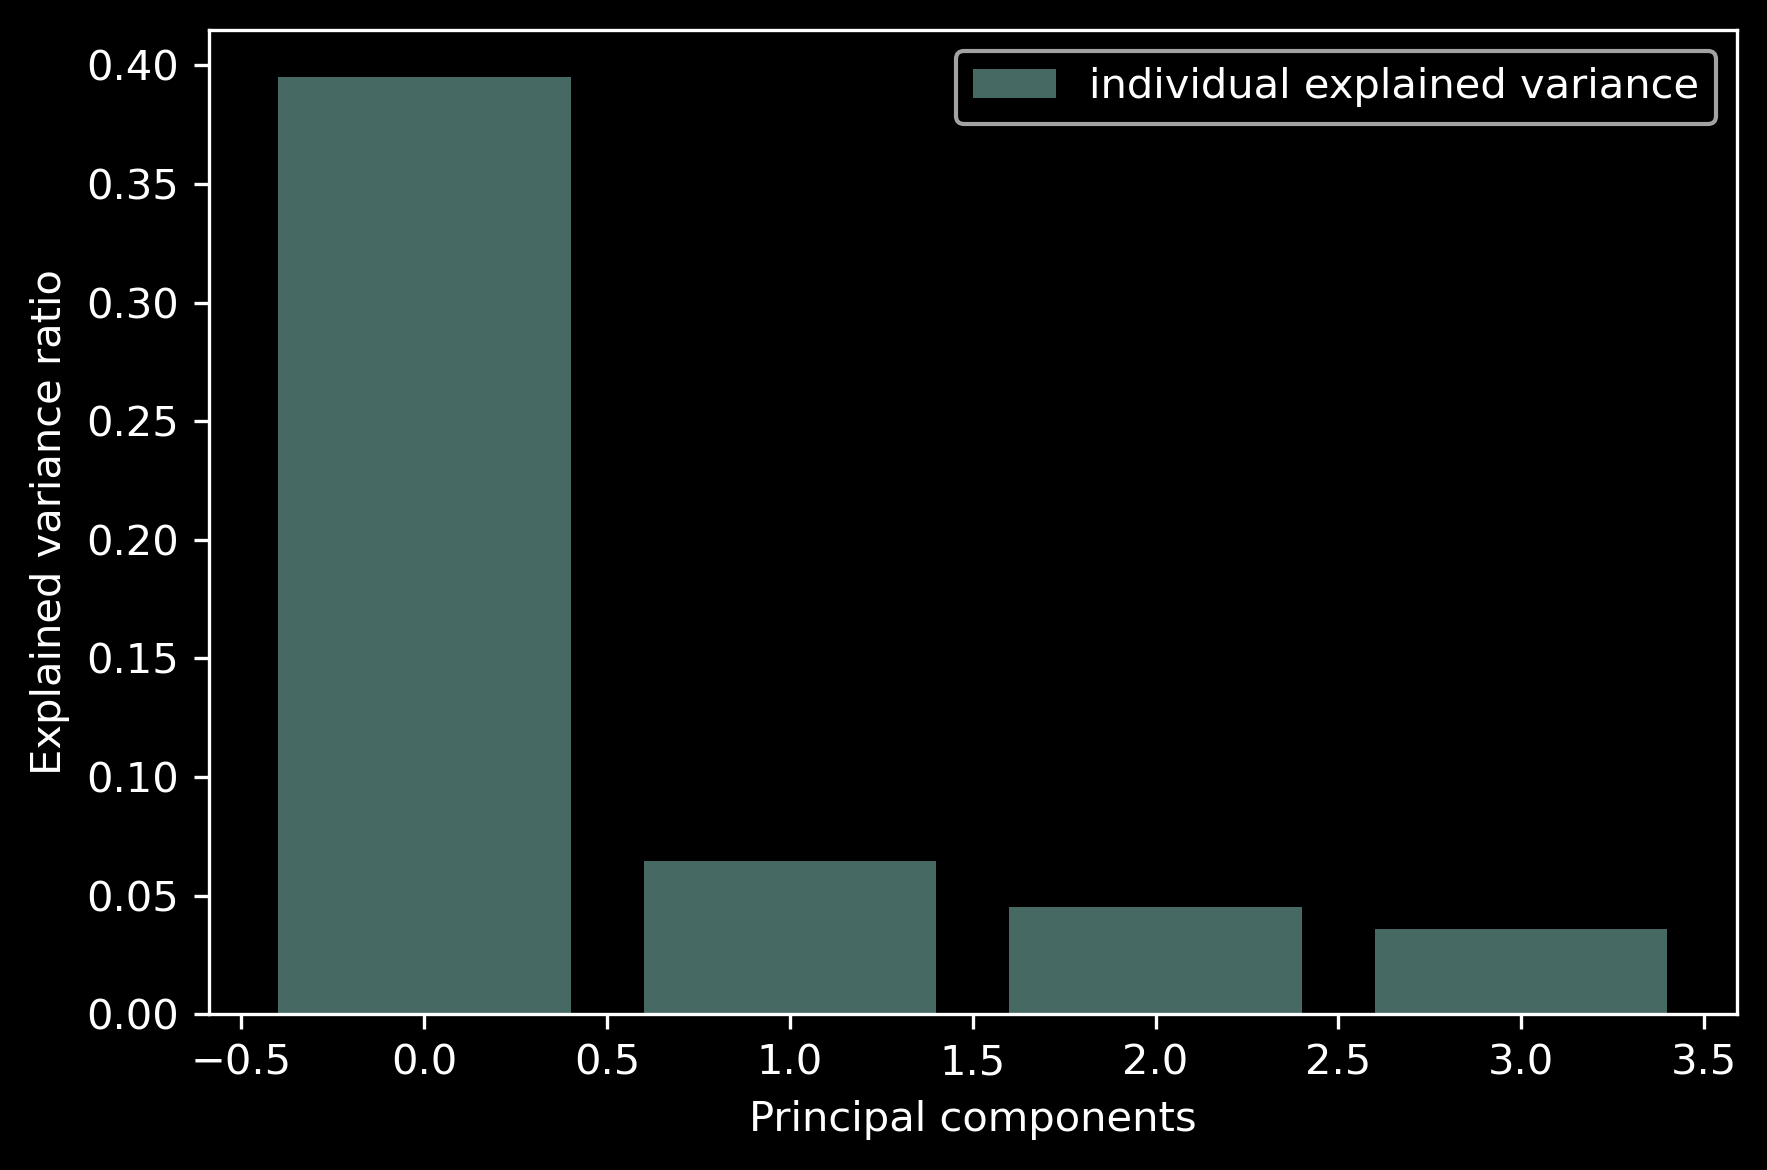

In [8]:

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4),dpi=300)

    plt.bar(range(4), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

[0 1]


(<Figure size 2400x2400 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA Dimensionality Reduction'}, xlabel='PCA-1', ylabel='PCA-2'>,
 [Text(-4.8197646999816435, 0.1733302935543753, 'NSCLC'),
  Text(19.12348753141138, -1.8102296385338144, 'Normal')])

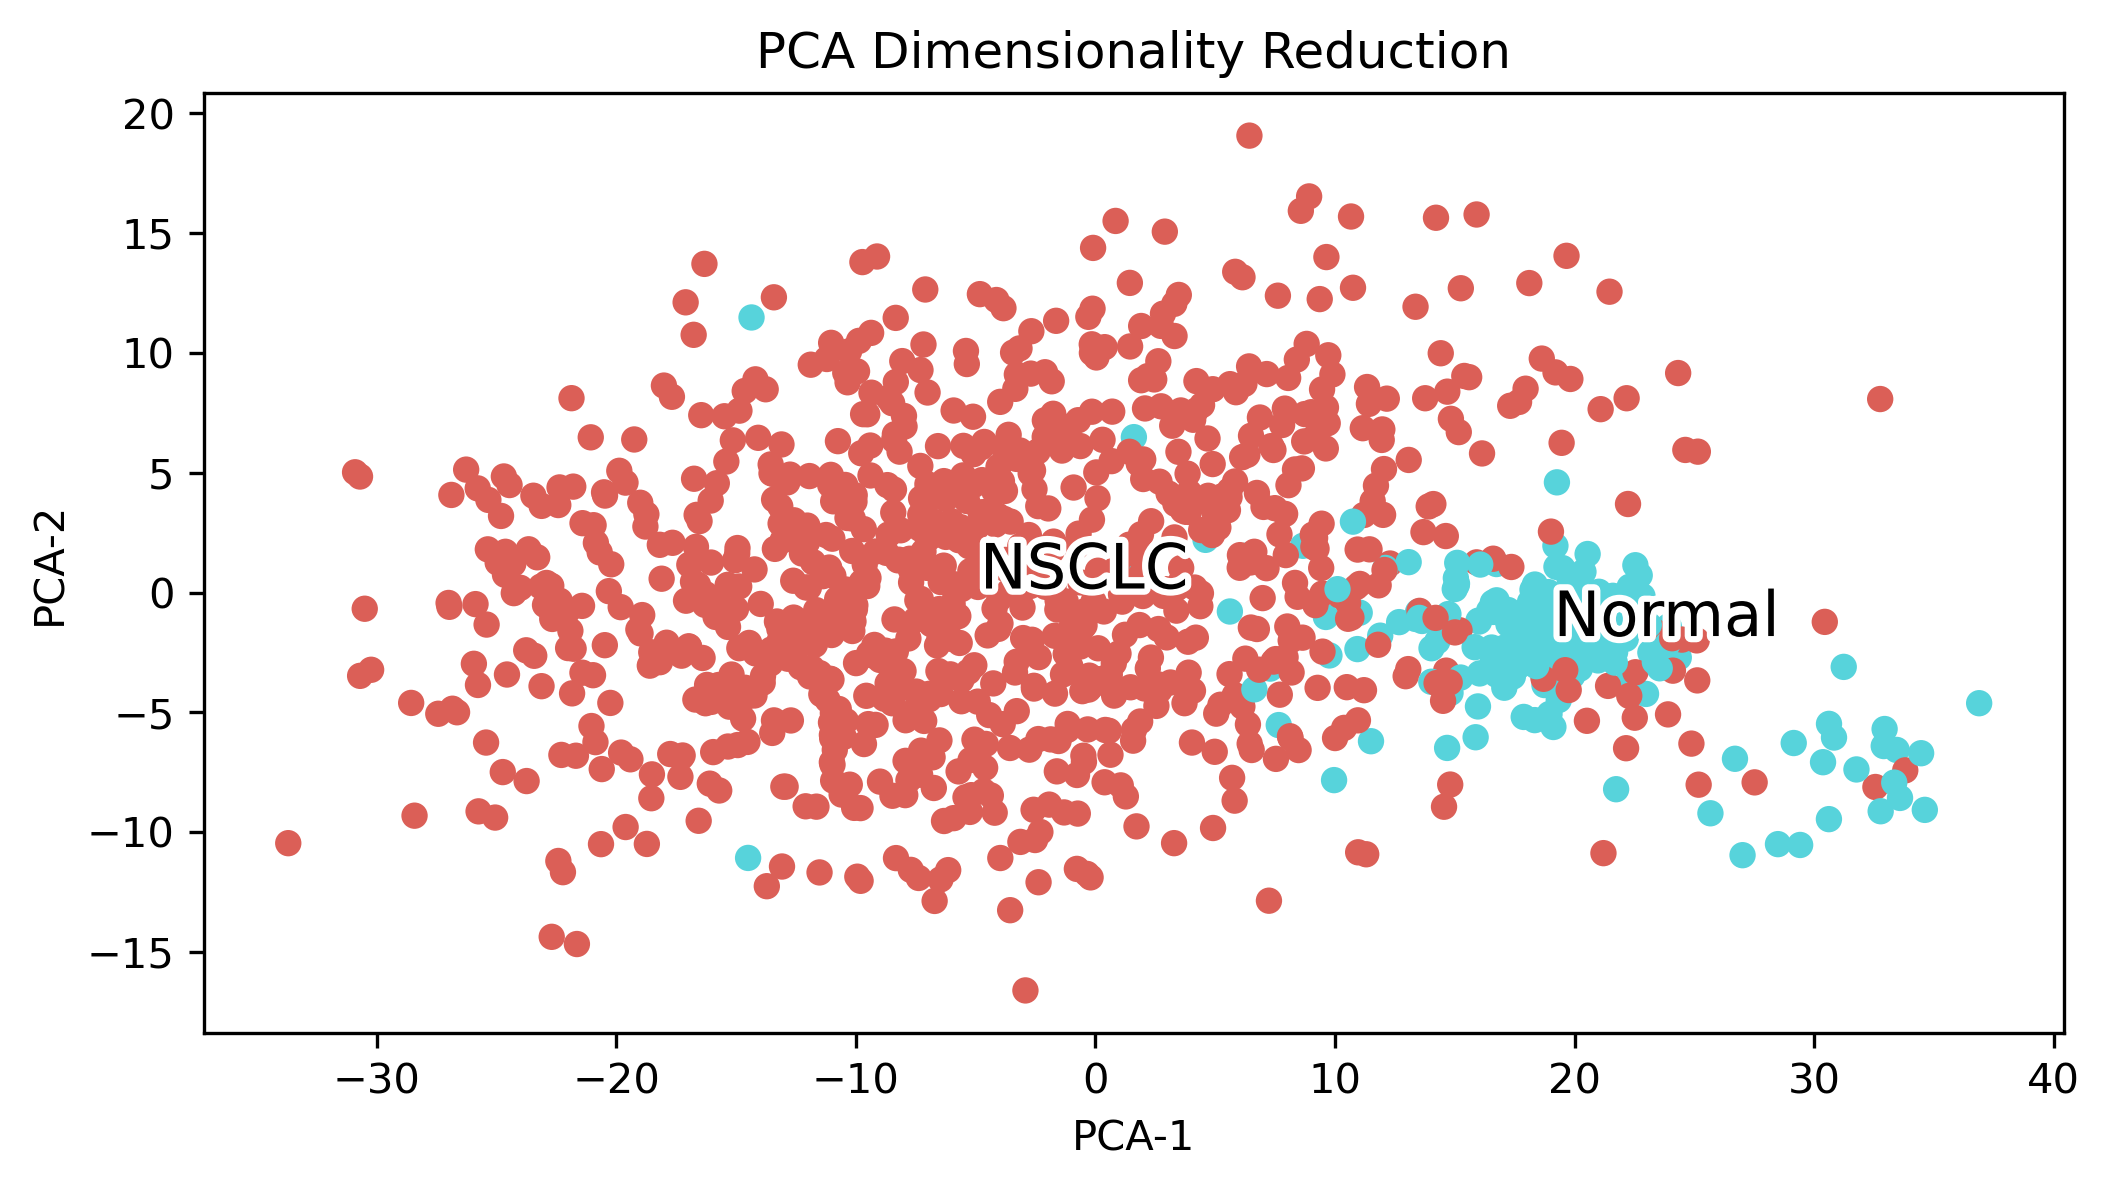

In [9]:

top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
Title = 'PCA Dimensionality Reduction'
fashion_scatter(top_two_comp.values,y, Title) # Visualizing the PCA output

[0 1]


(<Figure size 2400x2400 with 1 Axes>,
 <AxesSubplot:title={'center':'tSNE Dimensionality Reduction'}, xlabel='DIM-1', ylabel='DIM-2'>,
 [Text(1.1412965, -8.13376, 'NSCLC'), Text(-2.989511, 43.000175, 'Normal')])

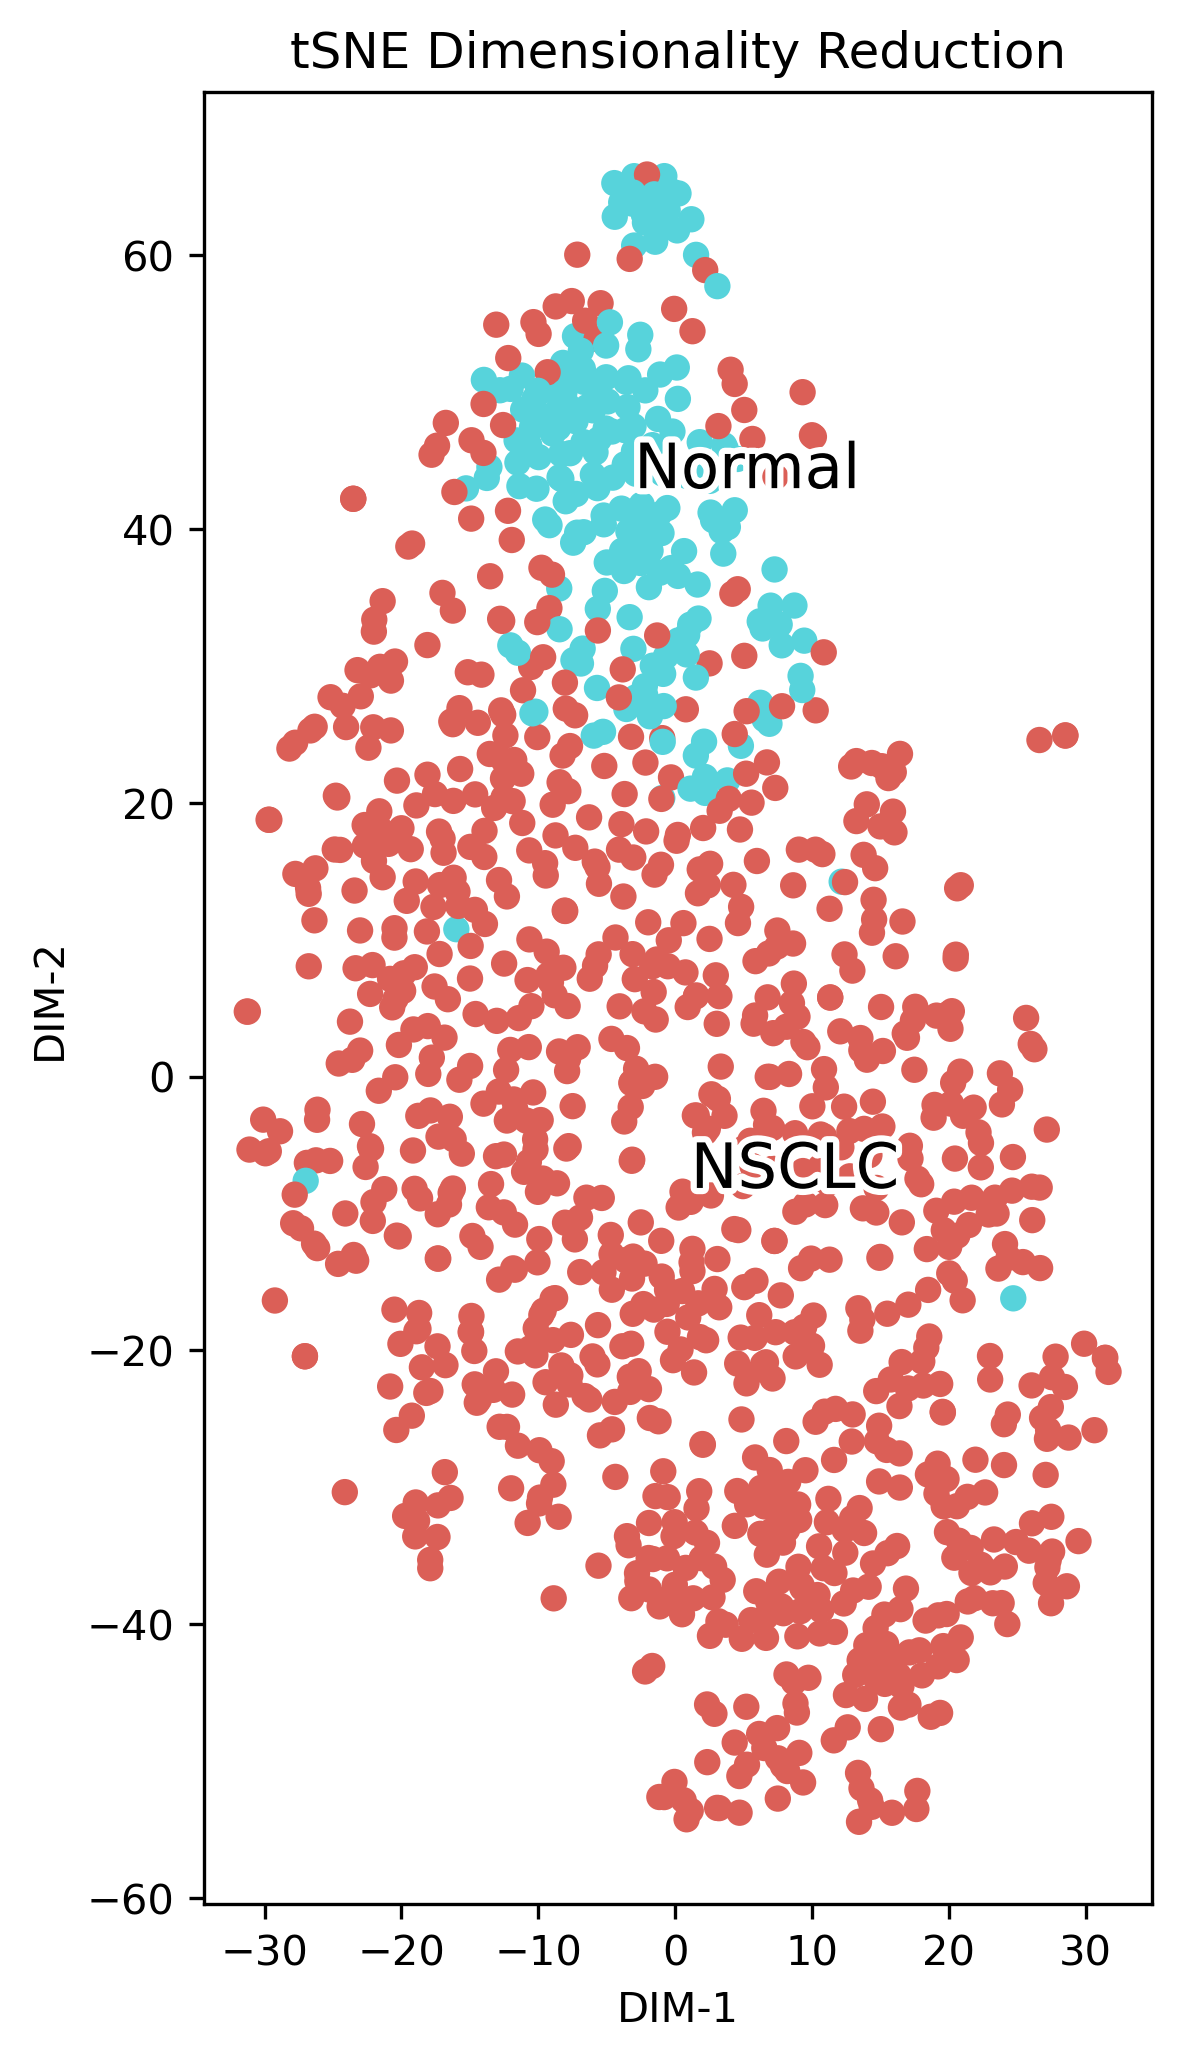

In [10]:
Title = 'tSNE Dimensionality Reduction'
fashion_scatter(fashion_tsne, y, Title)

# PCA followed by tSNE

In [11]:
time_start = time.time()

try:
    pca_50 = PCA(n_components=50, random_state = 2)
    pca_result_50 = pca_50.fit_transform(x)

    print ('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

    print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
    
except:
    pca_50 = PCA(n_components=50, random_state = 2)
    pca_result_50 = pca_50.fit_transform(x)

    print ('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

    print ('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 0.09873580932617188 seconds
Cumulative variance explained by 50 principal components: 0.8336490861984703


In [12]:
time_start = time.time()
fashion_pca_tsne = TSNE(random_state=2).fit_transform(pca_result_50)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 4.742313861846924 seconds


[0 1]


(<Figure size 2400x2400 with 1 Axes>,
 <AxesSubplot:title={'center':'PCA followed by tSNE Dimensionality Reduction'}, xlabel='DIM-1', ylabel='DIM-2'>,
 [Text(6.7634935, -3.649032, 'NSCLC'), Text(-43.765995, 11.577421, 'Normal')])

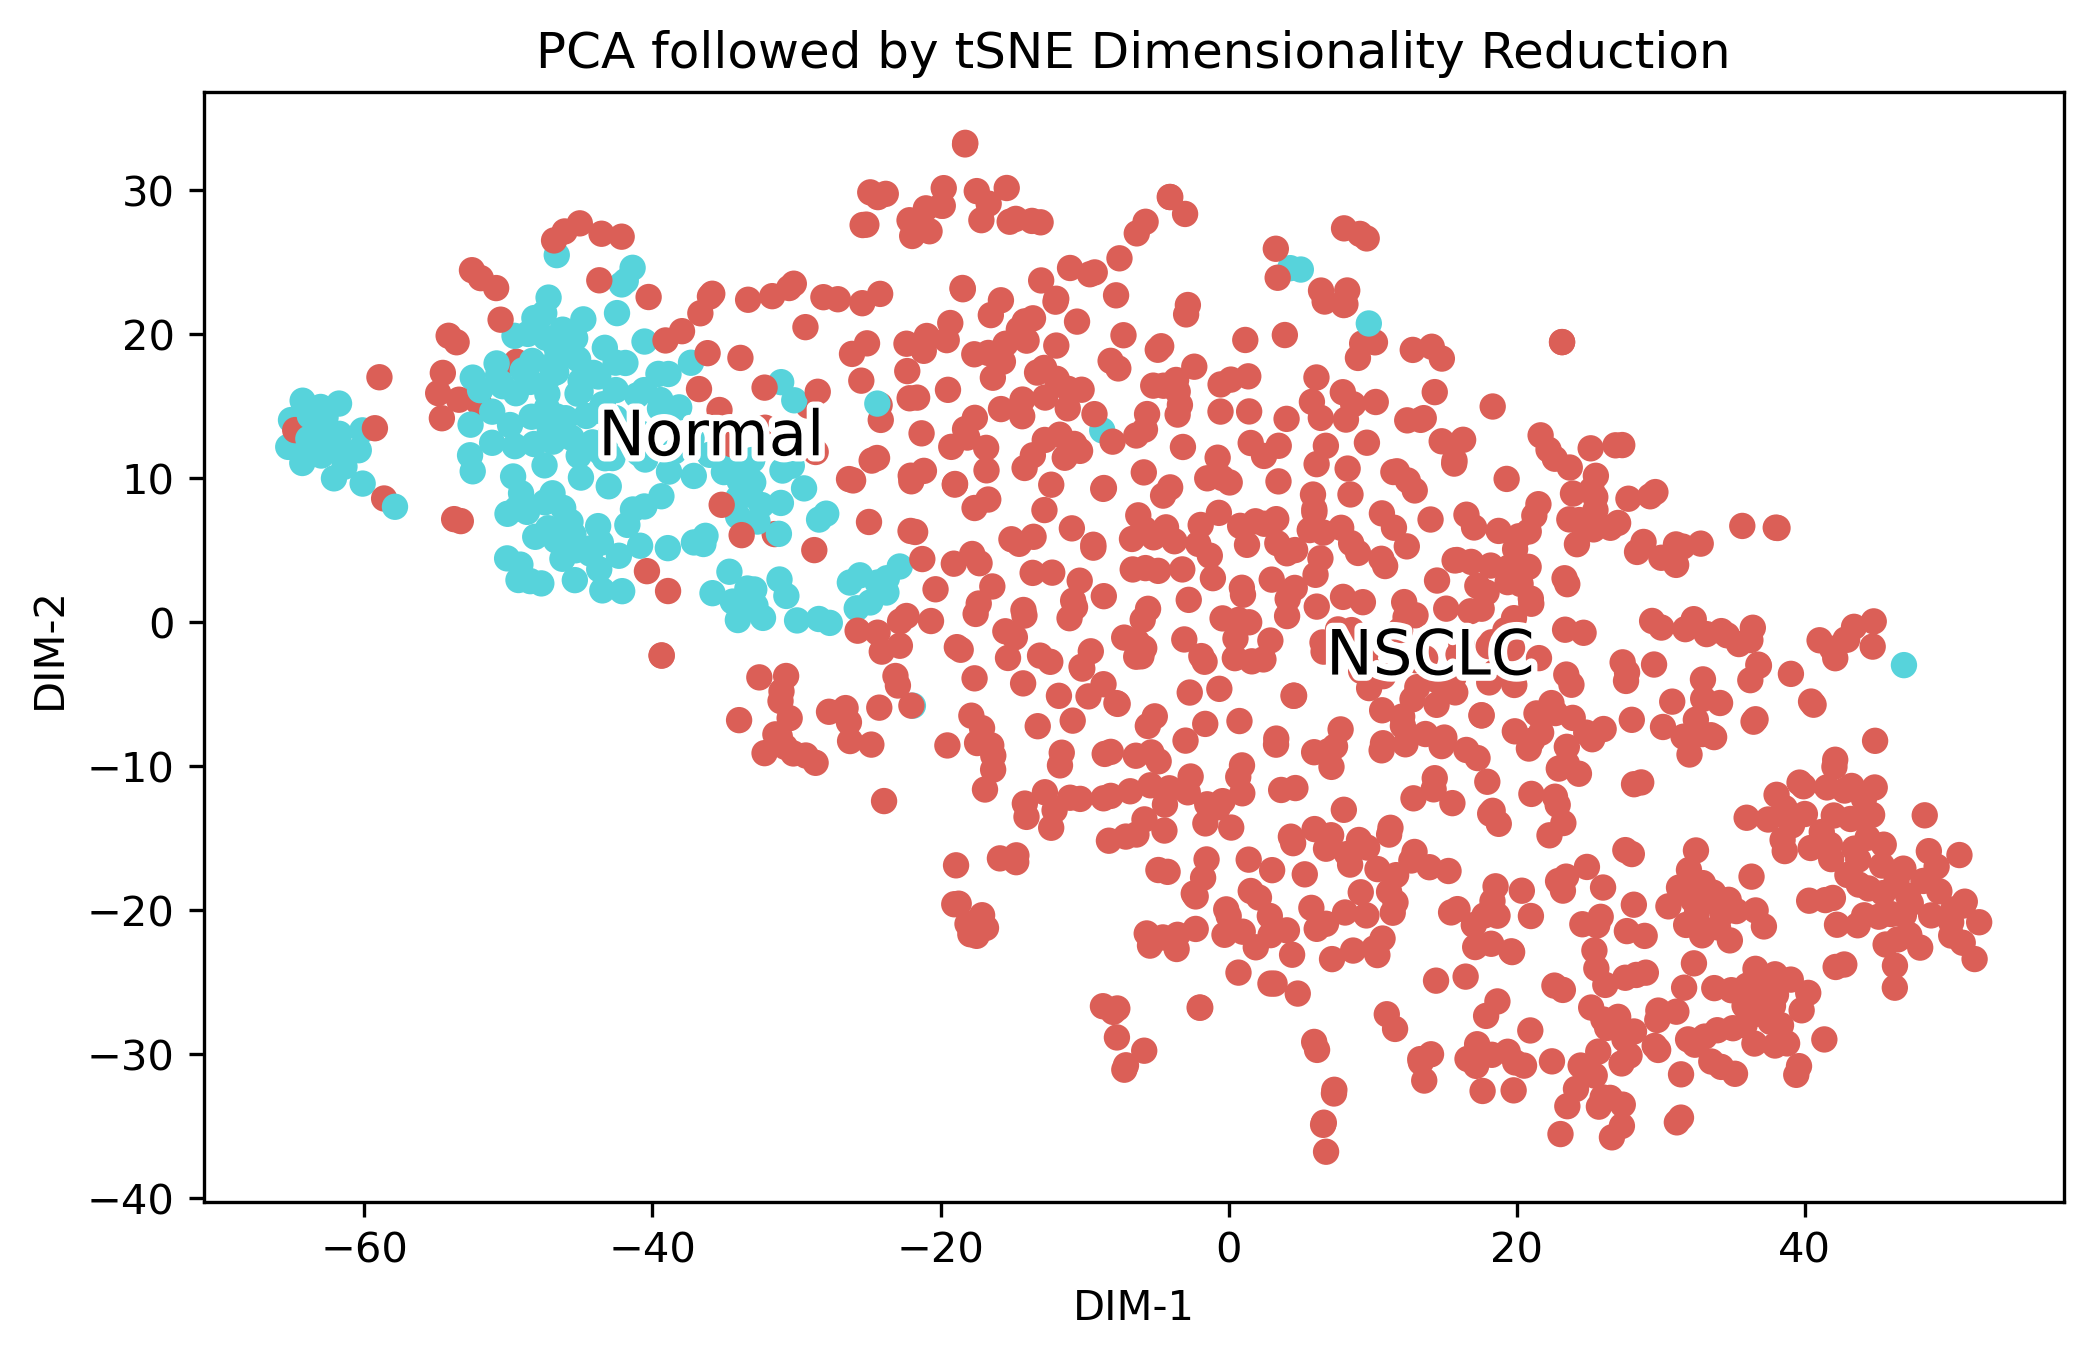

In [13]:
Title = 'PCA followed by tSNE Dimensionality Reduction'
fashion_scatter(fashion_pca_tsne, y, Title)

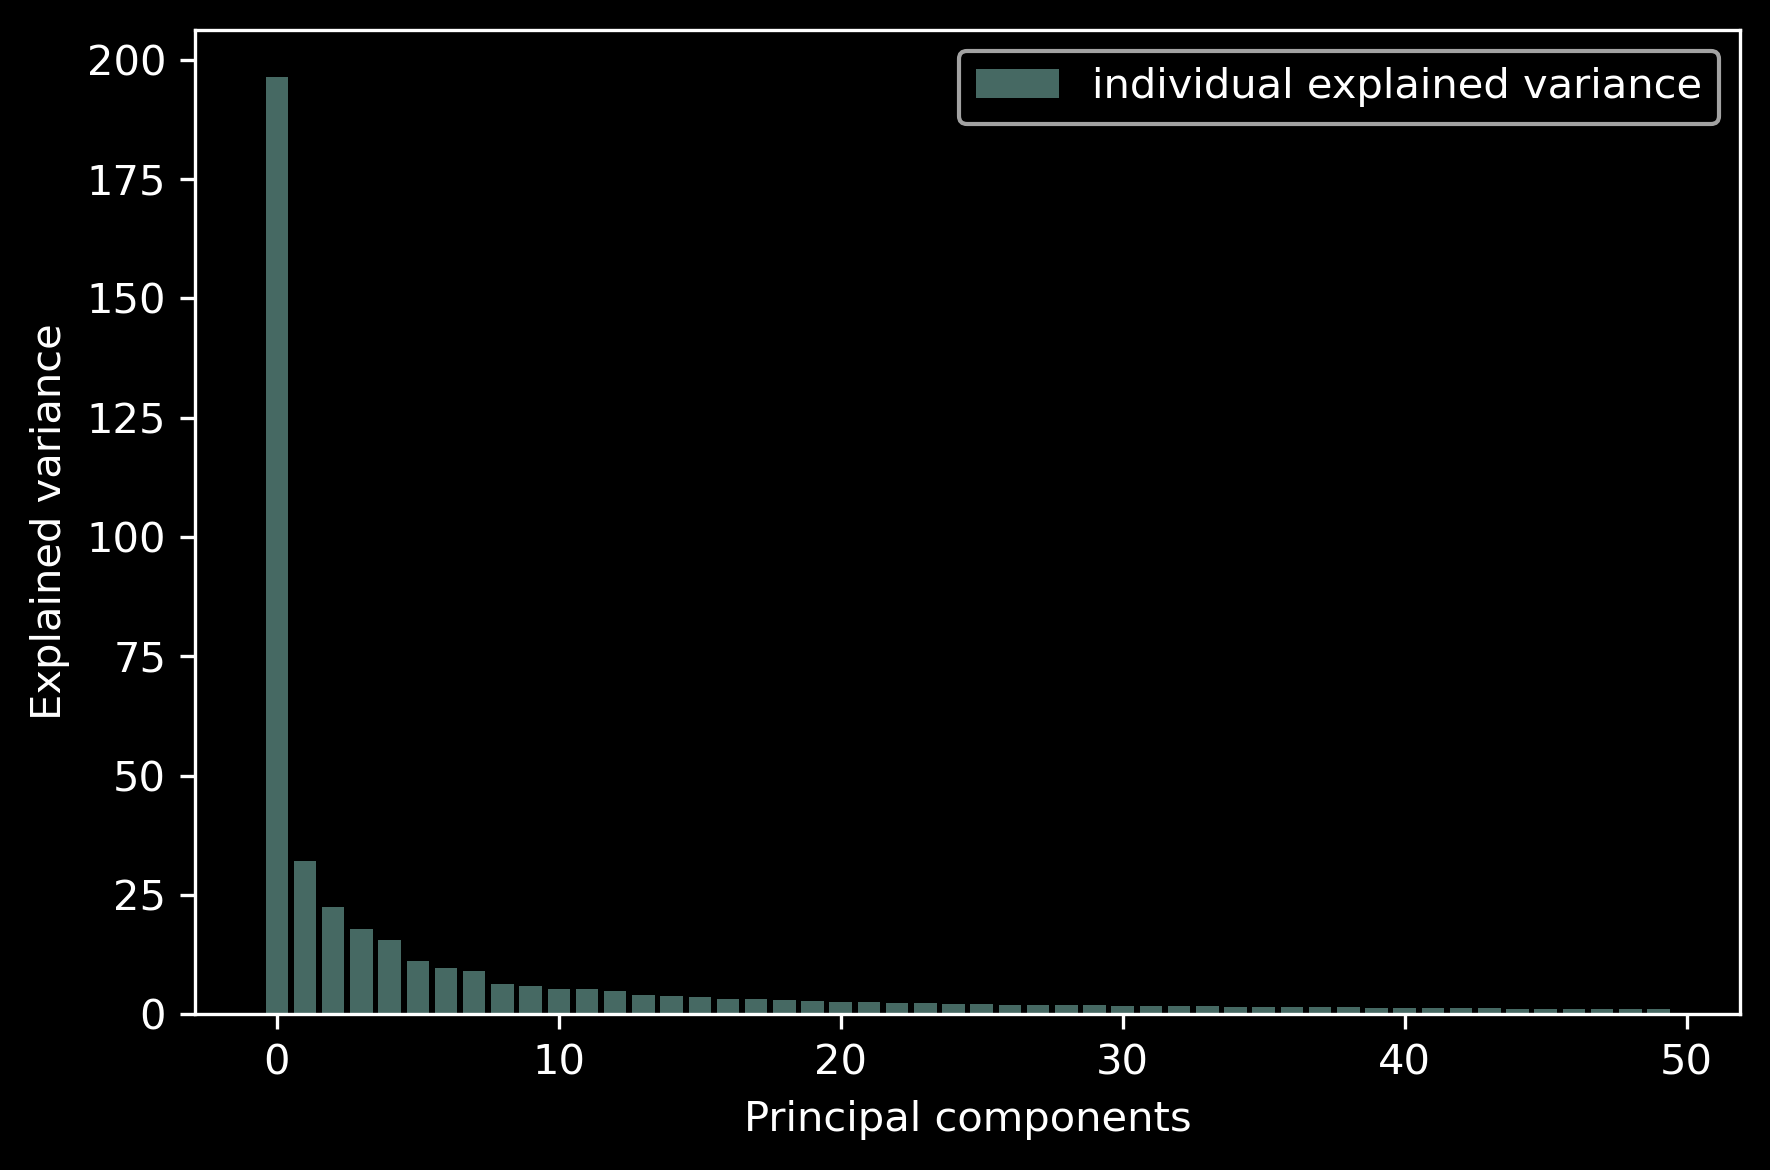

In [14]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4),dpi = 300)

    plt.bar(range(50),pca_50.explained_variance_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

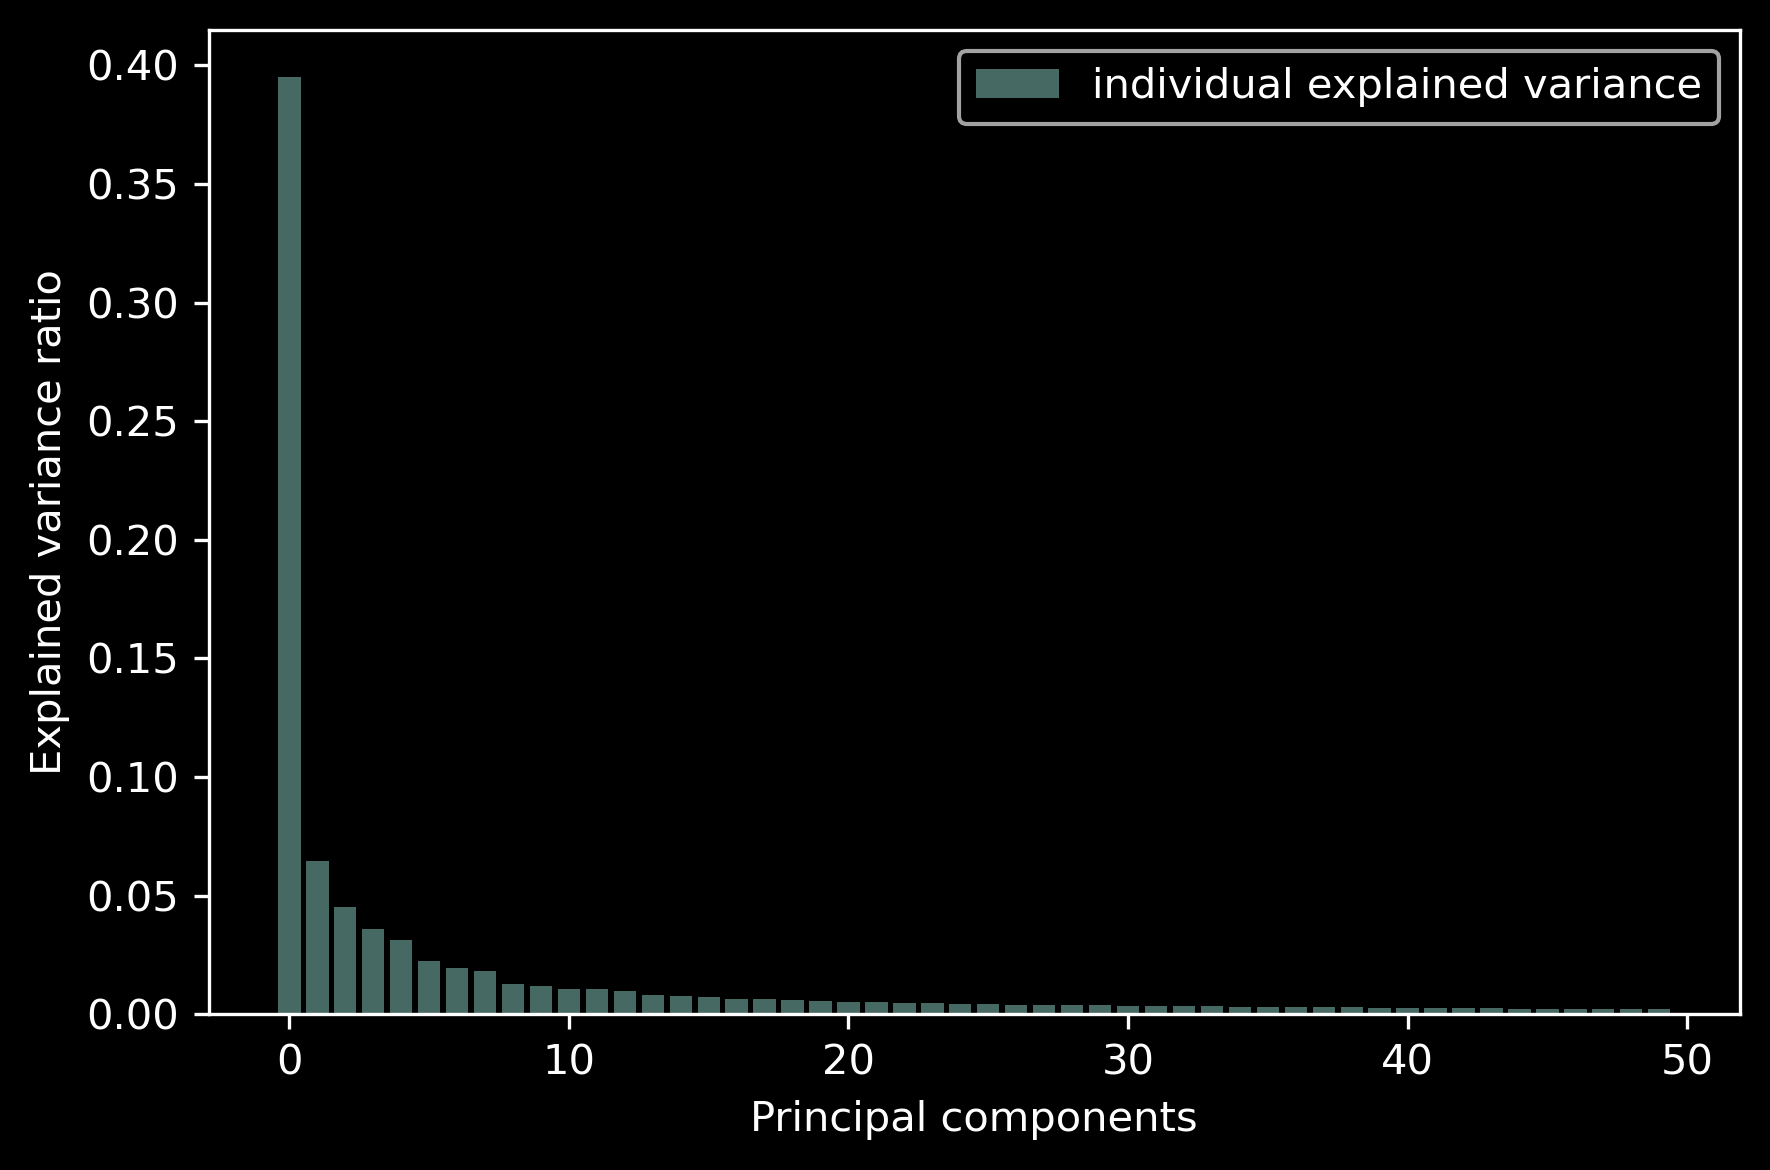

In [15]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4),dpi = 300)

    plt.bar(range(50),pca_50.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()